#Clustering jerarquico 
detecta a los individuos que puedan ser considerados como similares y los asigna a un mismo cluster dejando a los individuos disimilares en clusters distintos

1. Aglomerativo: Se trata de un enfoque "ascendente": Cada observación comienza en su propio conglomerado, y los pares de conglomerados se fusionan a medida que se asciende en la jerarquía.
2. Divisivo: Se trata de un enfoque "descendente": Todas las observaciones comienzan en un conglomerado, y las divisiones se realizan recursivamente a medida que se desciende en la jerarquía.

#Tecnicas de aglomeración/División
Sirven para determinar cuales clusters se irán agrupando

1. Método del vecino más próximo (nearest neighbor clustering)  o Enlace simple (Single linkage clustering)
2. Método del vecino más lejano (furthest neighbor clustering) o Enlace completo (Complete Linkage clustering)
3. Método de agrupación de vinculación promedio (Average linkage clustering) o Vinculación inter-grupo (unweighted Pair-group arithmetic averages (UPGMA))
4. Método de Ward o Varianza mínima (Minimum variante clustering)
5. Método del Centroide
6. Método de la Mediana

#Linkage

In [3]:
import scipy.cluster.hierarchy as sch 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import pandas as pd
path = "/content/drive/MyDrive/Ejemplo Estudiantes.csv"
Estudiantes = pd.read_csv(path, sep=",", encoding="ISO-8859-1", header=0, engine='python')

In [6]:
Estudiantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Estudiante   10 non-null     object 
 1   Matematicas  10 non-null     float64
 2   Ciencias     10 non-null     float64
 3   Espanol      10 non-null     float64
 4   Historia     10 non-null     float64
 5   Deportes     10 non-null     float64
dtypes: float64(5), object(1)
memory usage: 608.0+ bytes


In [7]:
Estudiantes

,Estudiante,Matematicas,Ciencias,Espanol,Historia,Deportes
0,Lucia,7.0,6.5,9.2,8.6,8.0
1,Pedro,7.5,9.4,7.3,7.0,7.0
2,Ines,7.6,9.2,8.0,8.0,7.5
3,Luis,5.0,6.5,6.5,7.0,9.0
4,Andres,6.0,6.0,7.8,8.9,7.3
5,Ana,7.8,9.6,7.7,8.0,6.5
6,Carlos,6.3,6.4,8.2,9.0,7.2
7,Jose,7.9,9.7,7.5,8.0,6.0
8,Sonia,6.0,6.0,6.5,5.5,8.7
9,Maria,6.8,7.2,8.7,9.0,7.0


In [8]:
calificaciones = Estudiantes.iloc[:, [1,2,3,4, 5]].values
calificaciones

array([[7. , 6.5, 9.2, 8.6, 8. ],
       [7.5, 9.4, 7.3, 7. , 7. ],
       [7.6, 9.2, 8. , 8. , 7.5],
       [5. , 6.5, 6.5, 7. , 9. ],
       [6. , 6. , 7.8, 8.9, 7.3],
       [7.8, 9.6, 7.7, 8. , 6.5],
       [6.3, 6.4, 8.2, 9. , 7.2],
       [7.9, 9.7, 7.5, 8. , 6. ],
       [6. , 6. , 6.5, 5.5, 8.7],
       [6.8, 7.2, 8.7, 9. , 7. ]])

**Creando el Dendrograma del Clustering Jerárquico**

In [9]:
Clustering_Jerarquico = linkage(calificaciones, 'ward')

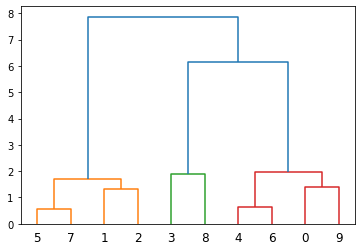

In [10]:
dendrogram = sch.dendrogram(Clustering_Jerarquico)

**asignando clusters a cada estudiante**

In [11]:
clusters = fcluster(Clustering_Jerarquico, t=1, criterion='distance')#altura a la cual se corta el dendrograma

In [12]:
clusters

array([7, 2, 3, 4, 6, 1, 6, 1, 5, 8], dtype=int32)

**Se crearon 8 clusters al cortar en t = 1**

agregando la clasificación al archivo original

In [13]:
Estudiantes['Clustering Jerarquico'] = clusters
Estudiantes

,Estudiante,Matematicas,Ciencias,Espanol,Historia,Deportes,Clustering Jerarquico
0,Lucia,7.0,6.5,9.2,8.6,8.0,7
1,Pedro,7.5,9.4,7.3,7.0,7.0,2
2,Ines,7.6,9.2,8.0,8.0,7.5,3
3,Luis,5.0,6.5,6.5,7.0,9.0,4
4,Andres,6.0,6.0,7.8,8.9,7.3,6
5,Ana,7.8,9.6,7.7,8.0,6.5,1
6,Carlos,6.3,6.4,8.2,9.0,7.2,6
7,Jose,7.9,9.7,7.5,8.0,6.0,1
8,Sonia,6.0,6.0,6.5,5.5,8.7,5
9,Maria,6.8,7.2,8.7,9.0,7.0,8


In [14]:
Estudiantes.to_csv('/content/drive/MyDrive/Estudiantes Clustering Jerarquico.csv')